In [1]:
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io as io
import matplotlib
from functools import reduce

from skimage.morphology import disk
from skimage.feature import blob_log


import trackpy

### import code from src folder
import sys
import os
sys.path.append('../../src')
import viz
import log_blobs_detector 
import traj_descriptors as td
import data_viz

import warnings
warnings.filterwarnings('ignore')

/Users/pichugina/anaconda3/envs/omeropy/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


## Tracks overlay

In [2]:
dxx=12.97 # mkm
dt=300 #s

FileList=glob('../../data/dt_300/tracks_overlay*.csv')
Tracks_Data=pd.DataFrame()

for file in FileList:
    tracks=pd.read_csv(file)
    Tracks_Data=pd.concat([Tracks_Data,tracks])

In [6]:
Tracks_Data.groupby(['particle','cut','file_id'])

5889

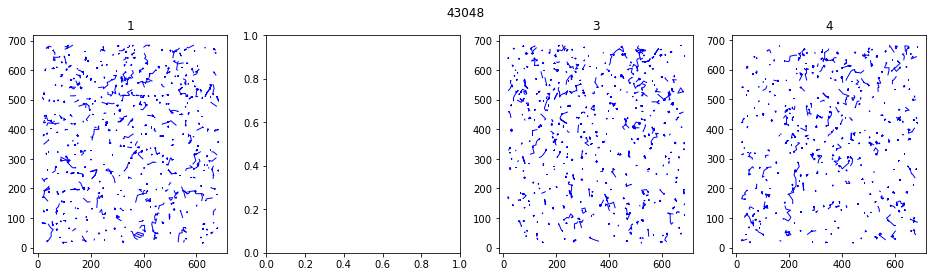

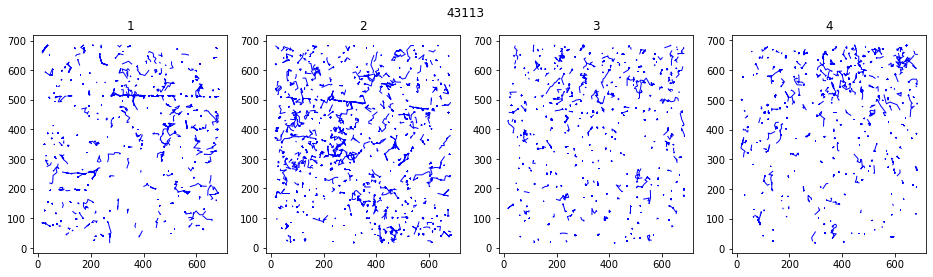

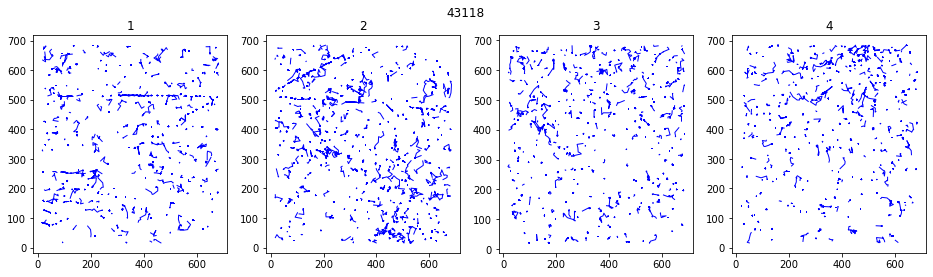

In [6]:
data_viz.plot_traj_overlay_replicas(Tracks_Data,1)

## Trajectories counts

In [7]:
#Tracks_Data["row"]=Tracks_Data["row"]*dxx
#Tracks_Data["col"]=Tracks_Data["col"]*dxx
#Tracks_Data["frame"]=Tracks_Data["frame"]*dt

grouped_tracks=Tracks_Data.groupby(['file_id', 'cut', 'particle'])
df1=grouped_tracks.apply(td.total_displacement).reset_index(name='TOTAL_DIST')
df2=grouped_tracks.apply(td.end_to_end_displacement).reset_index(name='END_TO_END')
df3=grouped_tracks.apply(td.max_distance_origin).reset_index(name='MAX_DIST_ORIG')
df4=grouped_tracks.apply(len).reset_index(name='TRAJ_LEN')
df5=grouped_tracks.apply(td.MSD).reset_index(name='MSD')

df=[df1,df2,df3,df4,df5]
TrajDescriptors = reduce(lambda  left,right: pd.merge(left,right,on=['file_id', 'cut', 'particle'],how='outer'), df)

In [8]:
TrajDescriptors.head(10)

file_id  cut  particle  TOTAL_DIST  END_TO_END  MAX_DIST_ORIG  TRAJ_LEN  \
0    43048    1         0    3.000000    1.000000       1.000000        18   
1    43048    1         2   13.485281    2.236068       2.236068        18   
2    43048    1         3   12.064495    1.414214       2.236068        18   
3    43048    1         4    7.236068    4.472136       4.472136        18   
4    43048    1         5    8.000000    0.000000       1.000000        18   
5    43048    1         6    2.000000    0.000000       1.000000        17   
6    43048    1         7   25.587667    0.000000       6.403124        18   
7    43048    1         8   17.242641    2.236068       2.236068        18   
8    43048    1         9    2.000000    0.000000       1.000000        10   
9    43048    1        10   11.385165    5.385165       5.830952        10   

        MSD  
0  0.420084  
1  1.000000  
2  0.970143  
3  0.766965  
4  0.685994  
5  0.353553  
6  2.743977  
7  1.306094  
8  0.471405  
9  1.972027

Text(0.5, 1.0, 'Number trajectories per experiment')

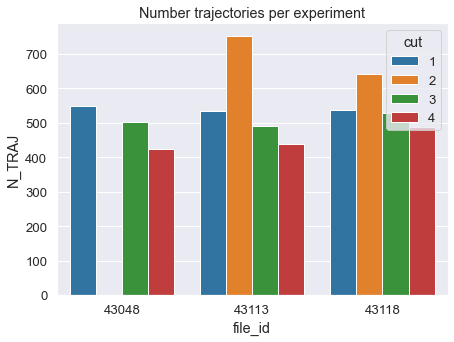

In [9]:
import seaborn as sns
sns.set(font_scale=1.2)
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(7,5))
Stat_Traj_Number=TrajDescriptors.groupby(['file_id','cut']).apply(lambda X: np.size(np.unique(X["particle"]))).reset_index(name='N_TRAJ')
sns.barplot(x="file_id",y="N_TRAJ",hue="cut",palette="tab10",data=Stat_Traj_Number,ax=ax)
ax.set_title("Number trajectories per experiment")



## Global descriptors

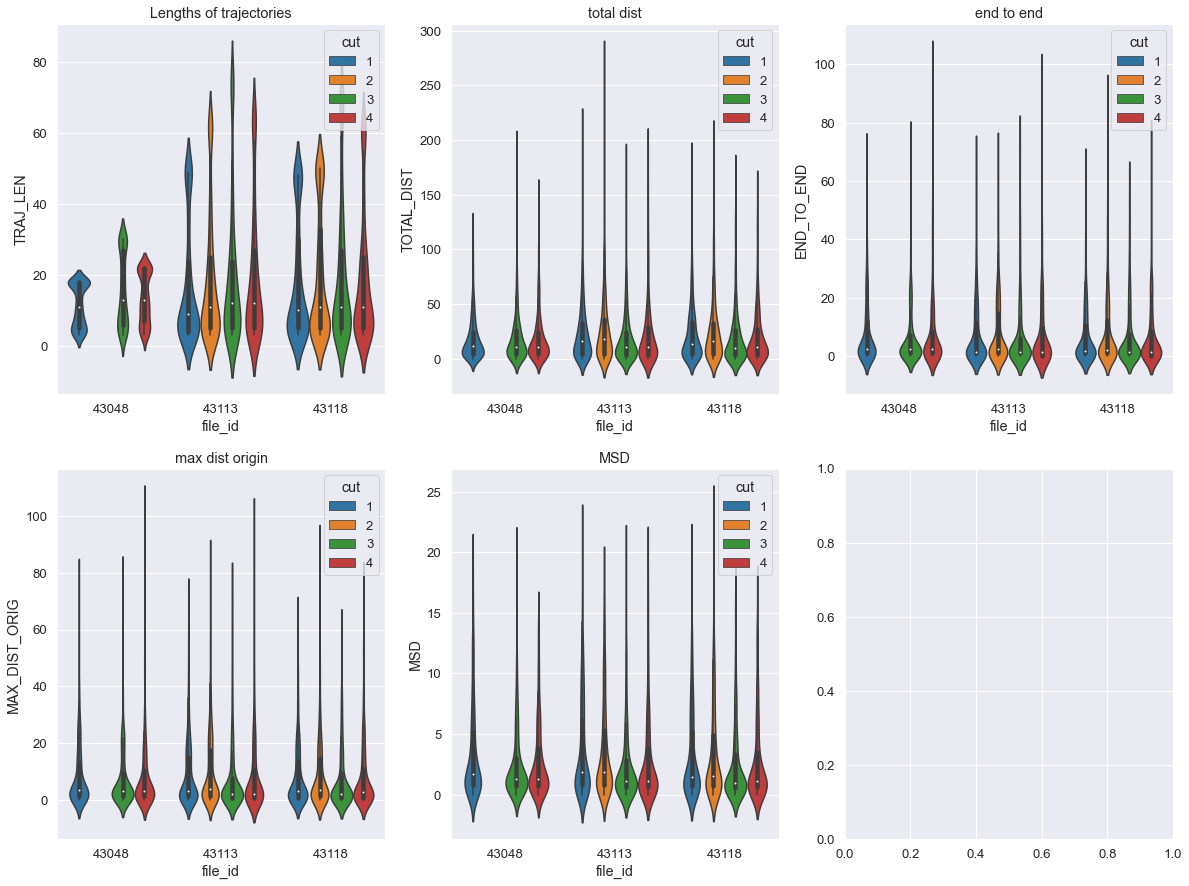

In [10]:
fig,axx=plt.subplots(nrows=2,ncols=3,figsize=(20,15))
ax=axx.ravel()
sns.violinplot(x="file_id",y="TRAJ_LEN",hue="cut",palette="tab10",showfliers = False,data=TrajDescriptors,ax=ax[0])
ax[0].set_title("Lengths of trajectories");

sns.violinplot(x="file_id",y='TOTAL_DIST',hue="cut",palette="tab10",showfliers = False,data=TrajDescriptors,ax=ax[1])
ax[1].set_title("total dist");

sns.violinplot(x="file_id",y='END_TO_END',hue="cut",palette="tab10",showfliers = False,data=TrajDescriptors,ax=ax[2])
ax[2].set_title("end to end");

sns.violinplot(x="file_id",y='MAX_DIST_ORIG',hue="cut",palette="tab10",showfliers = False,data=TrajDescriptors,ax=ax[3])
ax[3].set_title("max dist origin");

sns.violinplot(x="file_id",y='MSD',hue="cut",palette="tab10",showfliers = False,data=TrajDescriptors,ax=ax[4])
ax[4].set_title("MSD");

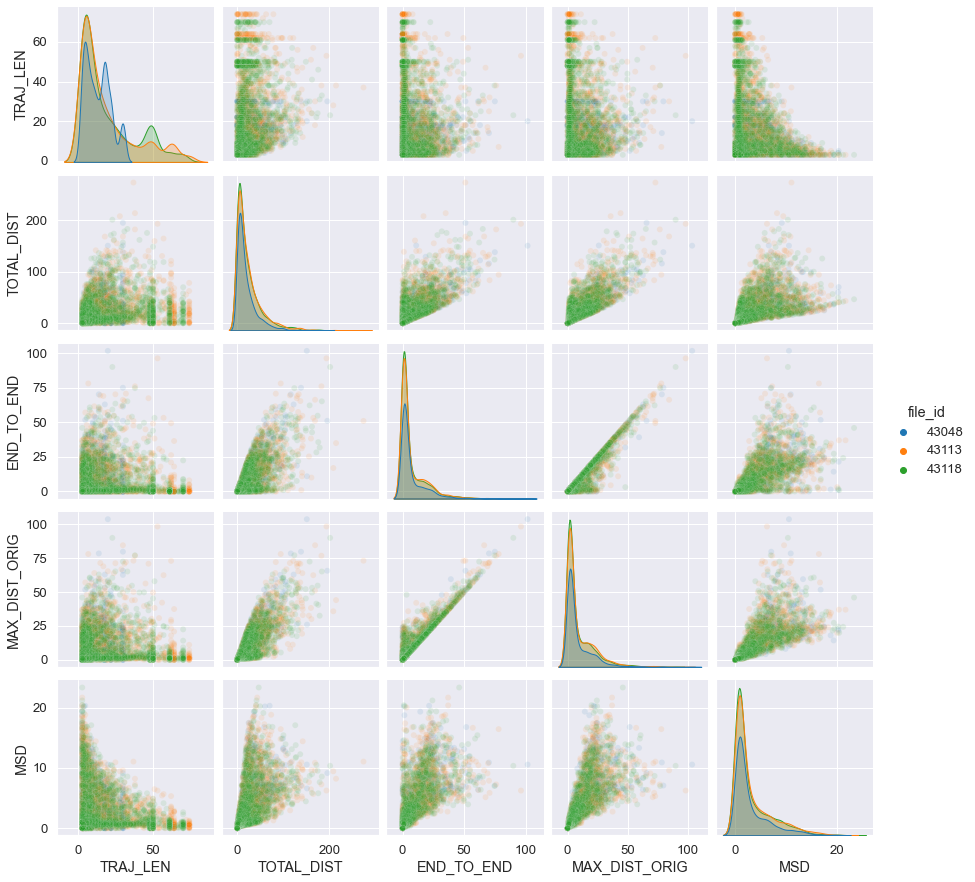

In [11]:
select=["file_id","TRAJ_LEN",'TOTAL_DIST','END_TO_END','MAX_DIST_ORIG','MSD']
sns.pairplot(data=TrajDescriptors[select],hue="file_id",palette="tab10",plot_kws={'alpha':0.1})

## Local descriptors

### Displacement

In [12]:
for file_id, group_file_id in Tracks_Data.groupby(['file_id']):
    fig,ax=plt.subplots(nrows=1,ncols=4,figsize=(16,4))
    
    for file_id, group_file_id in Tracks_Data.groupby(['file_id']):
    
    
    Displacement_data = pd.DataFrame()
    for traj in group.groupby(['particle']):
        dr,mod=td.traj_descriptors.displacement(traj)
        disp=pd.DataFrame(dr,columns=['DX','DY'])
        disp['MOD_DR']=mod
        disp['file_id']=traj['file_id'].values[0]
        disp['cut']=traj['cut'].values[0]
        disp['particle']=traj['particle'].values[0]
        Displacement_data=pd.concat([Displacement_data,disp])
        


plt.suptitle(file_id)
axx=ax.ravel()
for cut, cut_group in group .groupby("cut"):
            img_row,img_col=(700,700)
            for traj_id, traj in cut_group.groupby("particle"):
                plot_traj(traj,img_row,axx[cut-1],dxx)
                axx[cut-1].set_title("{}".format(cut))
# Displacement_data = pd.DataFrame()
# for id, traj in Data.groupby(['TRACK_ID']):
#     dr,mod=traj_descriptors.displacement(traj)
#     disp=pd.DataFrame(dr,columns=['DX','DY'])
#     disp['MOD_DR']=mod
#     disp['EXPERIMENT']=traj['EXPERIMENT'].values[0]
#     disp['REPLICA']=traj['REPLICA'].values[0]
#     disp['TRACK_ID']=traj['TRACK_ID'].values[0]
#     Displacement_data=pd.concat([Displacement_data,disp])





(43048, 1)
(43048, 3)
(43048, 4)
(43113, 1)
(43113, 2)
(43113, 3)
(43113, 4)
(43118, 1)
(43118, 2)
(43118, 3)
(43118, 4)


In [ ]:
TrajDescriptors_stable.hist(bins=50,figsize=(20,20))

#filter stable points
TrajDescriptors_stable=TrajDescriptors[(TrajDescriptors['MAX_DIST_ORIG']<3) & (TrajDescriptors['TRAJ_LEN']>15)] 
TrajDescriptors_stable.hist(bins=50,figsize=(20,20))
print(TrajDescriptors_stable.shape)
stable_tracks=tracks.loc[tracks['particle'].isin(TrajDescriptors_stable['particle'].values)]


In [19]:
(300*300*100+1)*3


27000003